In [113]:
import processing.parser as pr
import processing.model as md
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pr.get_raw_data(pr.tags, ['Москва'])
data

,osmid,type,object,name,lat,lon,geometry,city,historic,addr:street,...,contact:email,website,description,contact:vk,service_times,contact:facebook,contact:instagram,contact:twitter,contact:youtube,email
0,766464835,church,building,Часовня Макария Желтоводского,55.906487,37.597447,POINT (37.59745 55.90649),Москва,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2933250101,church,building,Церковь Иконы Божией Матери Отрада или Утешени...,55.653496,37.596644,POINT (37.59664 55.65350),Москва,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26233885,church,building,Храм Покрова Пресвятой Богородицы,55.865253,37.638074,"POLYGON ((37.63786 55.86527, 37.63798 55.86514...",Москва,NaN,Заповедная улица,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,27761504,church,building,Храм Иконы Божией Матери Утоли Моя Печали,55.648280,37.747505,"POLYGON ((37.74724 55.64833, 37.74733 55.64834...",Москва,NaN,Марьинский бульвар,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,27792896,church,building,Церковь Рождества Христова,55.860695,37.367642,"POLYGON ((37.36770 55.86079, 37.36745 55.86079...",Москва,NaN,1-я Муравская улица,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4134,9341259,theatre,amenity,Театр на Бронной,55.759587,37.598027,"POLYGON ((37.59810 55.75997, 37.59816 55.75994...",Москва,NaN,Малая Бронная улица,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mbronnaya@theatre.ru
4135,12314802,theatre,amenity,Золотое кольцо,55.811023,37.566728,"POLYGON ((37.56696 55.81128, 37.56705 55.81118...",Москва,NaN,Тимирязевская улица,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4136,13268537,theatre,amenity,Зелёный театр,55.831503,37.617507,"POLYGON ((37.61694 55.83137, 37.61695 55.83138...",Москва,NaN,проспект Мира,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4137,14085861,theatre,amenity,Московский театр иллюзий,55.743657,37.774302,"POLYGON ((37.77423 55.74351, 37.77421 55.74348...",Москва,NaN,улица Лазо,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
norm = pr.get_normilized(data)
norm

,is_culture,is_historic,is_religious,is_art,is_natural,popularity,time
0,1.0,0.0,1.0,0.0,0.0,0.000,0.000000
1,1.0,0.0,1.0,0.0,0.0,0.000,0.000000
2,1.0,0.0,1.0,0.0,0.0,0.000,0.000000
3,1.0,0.0,1.0,0.0,0.0,0.000,0.000000
4,1.0,0.0,1.0,0.0,0.0,0.250,0.000000
...,...,...,...,...,...,...,...
4134,1.0,0.0,0.0,0.0,0.0,0.875,0.111111
4135,1.0,0.0,0.0,0.0,0.0,0.375,0.037037
4136,1.0,0.0,0.0,0.0,0.0,0.000,0.037037
4137,1.0,0.0,0.0,0.0,0.0,0.000,0.111111


0.11711290707689007

In [114]:
def add_noise(row):
    return row.apply(lambda x: x + np.random.uniform(-0.25, 0.25))

In [115]:
df = norm.apply(lambda row: add_noise(row)).apply(lambda x: (x - x.min())/(x.max() - x.min()))

In [120]:
model = md.train_model(df, 2)

In [121]:
data['class'] = model.labels_

In [122]:
df

,is_culture,is_historic,is_religious,is_art,is_natural,popularity,time
0,0.760991,0.226270,0.769957,0.191378,0.143855,0.069974,0.070353
1,0.937526,0.207460,0.844937,0.082757,0.285688,0.191615,0.344997
2,0.899579,0.288127,0.959082,0.101770,0.077116,0.076383,0.011664
3,0.817948,0.188151,0.942365,0.329518,0.190878,0.317351,0.233466
4,0.822116,0.290979,0.697700,0.317653,0.236114,0.345048,0.255275
...,...,...,...,...,...,...,...
4134,0.998476,0.251894,0.263068,0.100887,0.280207,0.749613,0.420183
4135,0.907003,0.068448,0.266346,0.018583,0.075677,0.464858,0.367442
4136,0.859099,0.209749,0.132571,0.159497,0.024574,0.169310,0.235898
4137,0.891467,0.106261,0.110326,0.247817,0.140267,0.137177,0.241944


In [123]:
pd.pivot_table(data, index=['class', 'type'], aggfunc = np.count_nonzero)

addr:housenumber  addr:street  building:levels  city  \
class type                                                                     
0     attraction                       1            1                1     1   
      gallery                         24           24               24    24   
      memorial                      1789         1789             1789  1789   
      monument                        21           21               21    21   
      museum                         340          340              340   340   
1     attraction                     568          568              568   568   
      beach                            6            6                6     6   
      church                         323          323              323   323   
      gallery                         88           88               88    88   
      place_of_worship               667          667              667   667   
      theatre                        254          254              254   254   
      viewpoint                        6            6                6     6   
      yes                             52           52               52    52   

                        contact:email  contact:facebook  contact:instagram  \
class type                                                                   
0     attraction                    1                 1                  1   
      gallery                      24                24                 24   
      memorial                   1789              1789               1789   
      monument                     21                21                 21   
      museum                      340               340                340   
1     attraction                  568               568                568   
      beach                         6                 6                  6   
      church                      323               323                323   
      gallery                      88                88                 88   
      place_of_worship            667               667                667   
      theatre                     254               254                254   
      viewpoint                     6                 6                  6   
      yes                          52                52                 52   

                        contact:phone  contact:twitter  contact:vk  ...  name  \
class type                                                          ...         
0     attraction                    1                1           1  ...     1   
      gallery                      24               24          24  ...    24   
      memorial                   1789             1789        1789  ...  1789   
      monument                     21               21          21  ...    21   
      museum                      340              340         340  ...   340   
1     attraction                  568              568         568  ...   568   
      beach                         6                6           6  ...     6   
      church                      323              323         323  ...   323   
      gallery                      88               88          88  ...    88   
      place_of_worship            667              667         667  ...   667   
      theatre                     254              254         254  ...   254   
      viewpoint                     6                6           6  ...     6   
      yes                          52               52          52  ...    52   

                        object  opening_hours  osmid  phone  ref:temples.ru  \
class type                                                                    
0     attraction             1              1      1      1               1   
      gallery               24             24     24     24              24   
      memorial            1789           1789   1789   1789            1789   
      monument              21           

In [95]:
wcss = md.count_wcss(df)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

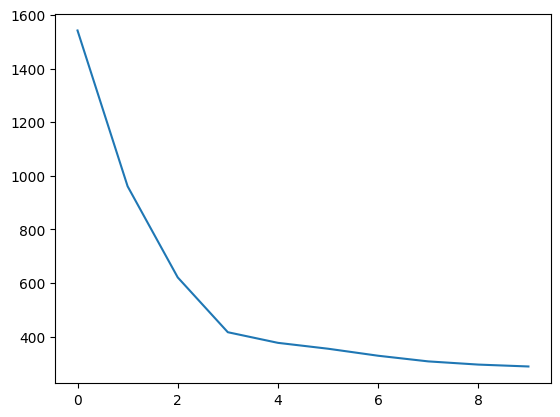

In [96]:
plt.plot(wcss)